In [12]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Step 1: Download stock data
ticker = 'AAPL'  # You can change this to any stock symbol
data = yf.download(ticker, start='2022-01-01', end='2023-01-01', interval='1d')

# Step 2: Calculate technical indicators (RSI, CCI, ADX)
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).cci()
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).adx()

# Drop rows with NaN values from the indicators
data.dropna(inplace=True)

# Create the target variable (binary classification - up/down movement)
data['Price_Change'] = data['Close'].shift(-1) - data['Close']
data['target'] = (data['Price_Change'] > 0).astype(int)  # 1 for up, 0 for down

# Since we used shift(-1), the last row will have NaN in 'Price_Change' and 'target'. Drop it.
data.dropna(subset=['Price_Change', 'target'], inplace=True)

# Step 3: Prepare features and labels
X = data[['RSI', 'CCI', 'ADX']]
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False
)

# Step 4: Define the Lorentzian distance function
def lorentzian_distance(x, y):
    return np.sum(np.log(1 + np.abs(x - y)))

# Step 5: Create a KNN classifier using Lorentzian distance
class LorentzianKNN(KNeighborsClassifier):
    def __init__(self, n_neighbors=5):
        super().__init__(
            n_neighbors=n_neighbors,
            metric=lorentzian_distance,
            algorithm='brute'
        )

# Initialize LorentzianKNN with k=3
knn = LorentzianKNN(n_neighbors=3)

# Step 6: Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed

Accuracy: 47.22%


In [11]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=ed928feba322702c671f6b7f4048a911ea4bd3cb93e0843e254a48918713cf17
  Stored in directory: /Users/hcoh/Library/Caches/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge ta-lib

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hf0a4a13_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.9.1               |  py312h81bd7bf_0         1.1 MB  conda-forge
    libexpat-2.6.2             |       hebf3989_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-forge
    libta-lib-0.4.0            |       hb547adb_2         236 KB  conda-forge
    libzlib-1.2.13             |       hfb2fe0b_6          46 KB  conda-forge
    openssl-3.3.2              |       h8359307_0         2.7 MB  conda-forge
    python-3.12.2              |hdf0ec26_0_cpyth

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform()
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 3: Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        40
           1       0.44      0.47      0.45        32

    accuracy                           0.50        72
   macro avg       0.50      0.50      0.50        72
weighted avg       0.50      0.50      0.50        72



In [14]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical Analysis library
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Download stock data
ticker = 'AAPL'  # You can change this to any stock symbol
data = yf.download(ticker, start='2021-01-01', end='2023-01-01', interval='1d')

# Step 2: Calculate technical indicators (Adding more variables)
# Existing indicators
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).cci()
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).adx()

# Additional indicators
data['EMA'] = ta.trend.EMAIndicator(close=data['Close'], window=14).ema_indicator()
data['MACD'] = ta.trend.MACD(close=data['Close']).macd()
data['Stochastic'] = ta.momentum.StochasticOscillator(high=data['High'], low=data['Low'], close=data['Close']).stoch()
data['Williams %R'] = ta.momentum.WilliamsRIndicator(high=data['High'], low=data['Low'], close=data['Close'], lbp=14).williams_r()
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Close'], window=14).average_true_range()
data['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=data['Close'], volume=data['Volume']).on_balance_volume()

# Step 3: Create lagged features
lag_features = ['RSI', 'CCI', 'ADX', 'EMA', 'MACD', 'Stochastic', 'Williams %R', 'ATR', 'OBV']
for feature in lag_features:
    for lag in range(1, 4):  # Lag of 1 to 3 days
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)

# Step 4: Create the target variable (binary classification - up/down movement)
data['Price_Change'] = data['Close'].shift(-1) - data['Close']
data['target'] = (data['Price_Change'] > 0).astype(int)  # 1 for up, 0 for down

# Step 5: Clean the data
# Drop rows with NaN values (from indicators and lagged features)
data.dropna(inplace=True)

# Step 6: Prepare features and labels
feature_columns = [col for col in data.columns if col not in ['Price_Change', 'target', 'Close', 'High', 'Low', 'Open', 'Adj Close', 'Volume']]
X = data[feature_columns]
y = data['target']

# Step 7: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Implement Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(n_estimators=100, random_state=42)

accuracy_scores = []
fold = 1
for train_index, test_index in tscv.split(X_scaled):
    print(f'Fold {fold}')
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    fold += 1

# Step 9: Display average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f'\nAverage Accuracy over {tscv.n_splits} folds: {average_accuracy * 100:.2f}%')


[*********************100%***********************]  1 of 1 completed


Fold 1
Accuracy: 49.37%
Fold 2
Accuracy: 53.16%
Fold 3
Accuracy: 51.90%
Fold 4
Accuracy: 54.43%
Fold 5
Accuracy: 58.23%

Average Accuracy over 5 folds: 53.42%


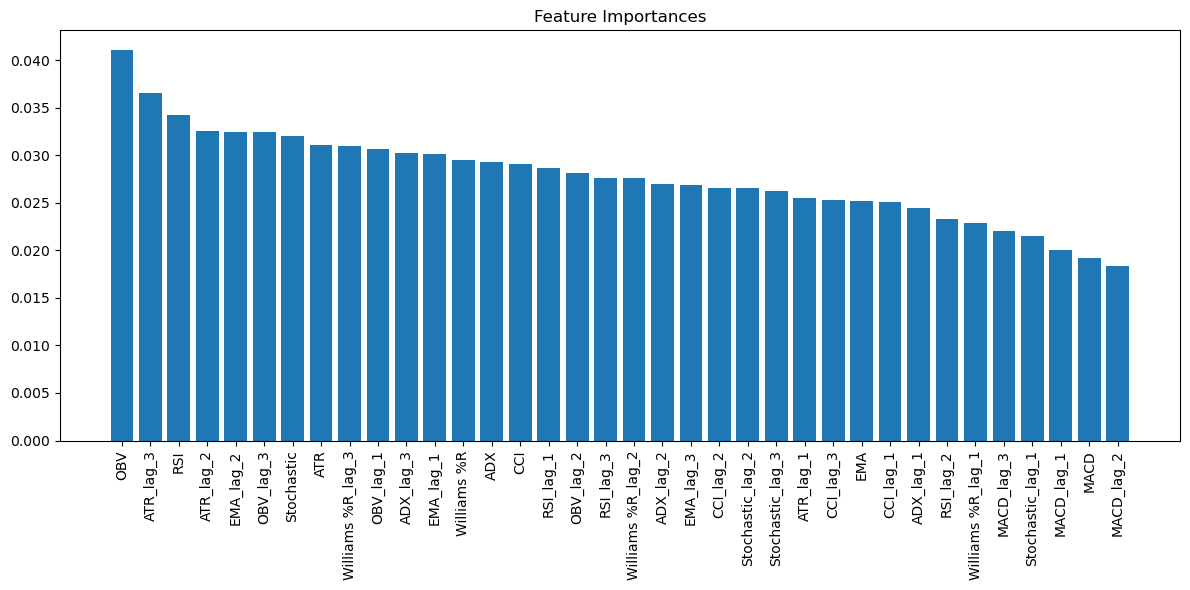

In [15]:
# Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [feature_columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        43
           1       0.53      0.72      0.61        36

    accuracy                           0.58        79
   macro avg       0.60      0.59      0.58        79
weighted avg       0.60      0.58      0.58        79



In [17]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical Analysis library
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Download stock data
ticker = 'AAPL'  # You can change this to any stock symbol
data = yf.download(ticker, start='2020-01-01', end='2023-01-01', interval='1d')

# Step 2: Calculate technical indicators (Adding more variables)
# Existing indicators
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).cci()
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).adx()

# Additional indicators
data['EMA'] = ta.trend.EMAIndicator(close=data['Close'], window=14).ema_indicator()
data['MACD'] = ta.trend.MACD(close=data['Close']).macd()
data['Stochastic'] = ta.momentum.StochasticOscillator(
    high=data['High'], low=data['Low'], close=data['Close']).stoch()
data['Williams %R'] = ta.momentum.WilliamsRIndicator(
    high=data['High'], low=data['Low'], close=data['Close'], lbp=14).williams_r()
data['ATR'] = ta.volatility.AverageTrueRange(
    high=data['High'], low=data['Low'], close=data['Close'], window=14).average_true_range()
data['OBV'] = ta.volume.OnBalanceVolumeIndicator(
    close=data['Close'], volume=data['Volume']).on_balance_volume()

# Step 3: Fit ARIMA model and get residuals
# We'll use ARIMA to model the closing prices
# First, we need to handle any missing values in 'Close'
data['Close'].fillna(method='ffill', inplace=True)

# Fit ARIMA model (p=5, d=1, q=0) - you can optimize these parameters
arima_order = (5, 1, 0)
arima_model = ARIMA(data['Close'], order=arima_order)
arima_fit = arima_model.fit()

# Get ARIMA predictions
data['ARIMA_Pred'] = arima_fit.predict(start=0, end=len(data)-1, dynamic=False)
# Calculate residuals
data['ARIMA_Resid'] = data['Close'] - data['ARIMA_Pred']

# Step 4: Create lagged features
lag_features = ['RSI', 'CCI', 'ADX', 'EMA', 'MACD',
                'Stochastic', 'Williams %R', 'ATR', 'OBV', 'ARIMA_Resid', 'ARIMA_Pred']
for feature in lag_features:
    for lag in range(1, 4):  # Lag of 1 to 3 days
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)

# Step 5: Create the target variable (binary classification - up/down movement)
data['Price_Change'] = data['Close'].shift(-1) - data['Close']
data['target'] = (data['Price_Change'] > 0).astype(int)  # 1 for up, 0 for down

# Step 6: Clean the data
# Drop rows with NaN values (from indicators, lagged features, and ARIMA)
data.dropna(inplace=True)

# Step 7: Prepare features and labels
feature_columns = [col for col in data.columns if col not in ['Price_Change', 'target',
                                                              'Close', 'High', 'Low',
                                                              'Open', 'Adj Close', 'Volume',
                                                              'Date']]
X = data[feature_columns]
y = data['target']

# Step 8: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Implement Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(n_estimators=100, random_state=42)

accuracy_scores = []
fold = 1
for train_index, test_index in tscv.split(X_scaled):
    print(f'Fold {fold}')
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    fold += 1

# Step 10: Display average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f'\nAverage Accuracy over {tscv.n_splits} folds: {average_accuracy * 100:.2f}%')


[*********************100%***********************]  1 of 1 completed
/var/folders/bj/v7yqq2jx251dklc4d7nj2vyc0000gn/T/ipykernel_26582/1706420032.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
/var/folders/bj/v7yqq2jx251dklc4d7nj2vyc0000gn/T/ipykernel_26582/1706420032.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
/opt/anaconda3

Fold 1
Accuracy: 40.50%
Fold 2
Accuracy: 54.55%
Fold 3
Accuracy: 57.02%
Fold 4
Accuracy: 50.41%
Fold 5
Accuracy: 53.72%

Average Accuracy over 5 folds: 51.24%


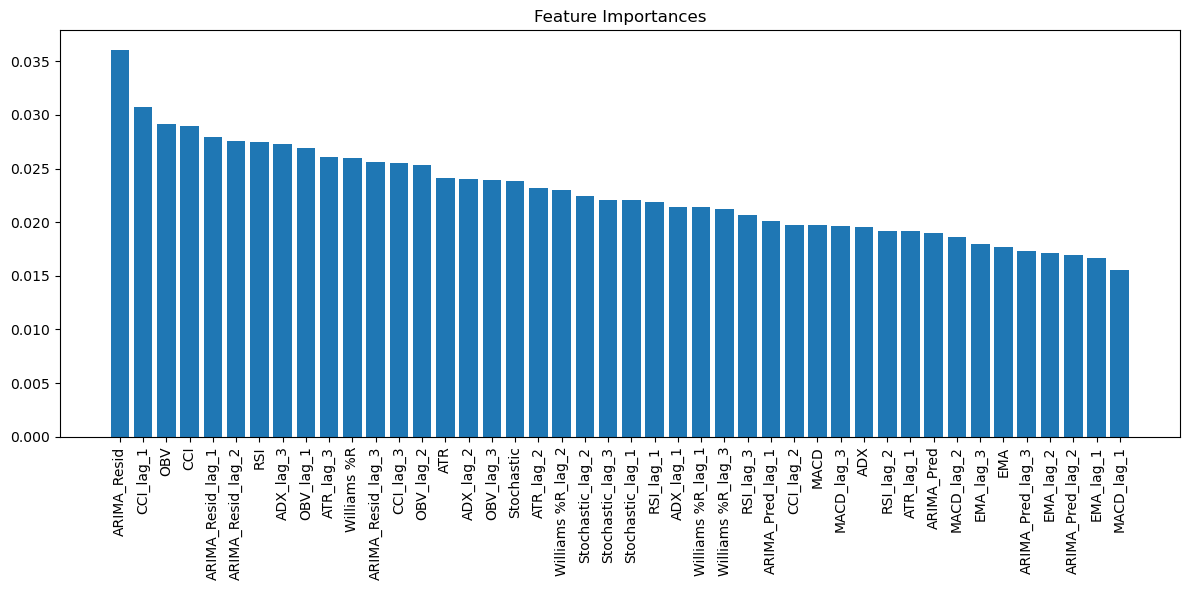

In [18]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [feature_columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        66
           1       0.49      0.53      0.51        55

    accuracy                           0.54       121
   macro avg       0.54      0.54      0.54       121
weighted avg       0.54      0.54      0.54       121

Confusion Matrix:
[[36 30]
 [26 29]]


In [20]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)


[*********************100%***********************]  1 of 1 completed


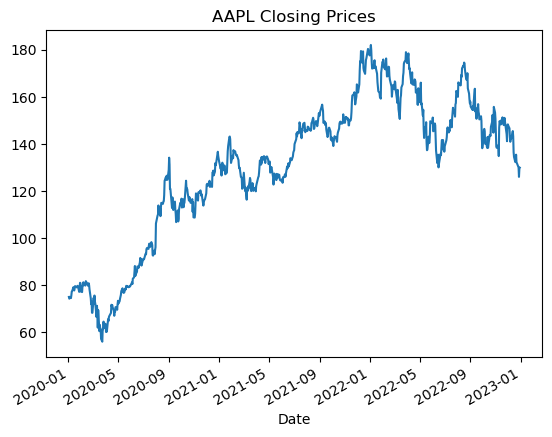

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1843.397
Date:                Tue, 08 Oct 2024   AIC                           3698.795
Time:                        12:42:12   BIC                           3726.555
Sample:                             0   HQIC                          3709.488
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0632      0.032     -1.991      0.047      -0.126      -0.001
ar.L2         -0.0276      0.032     -0.867      0.386      -0.090       0.035
ar.L3         -0.0319      0.036     -0.895      0.3

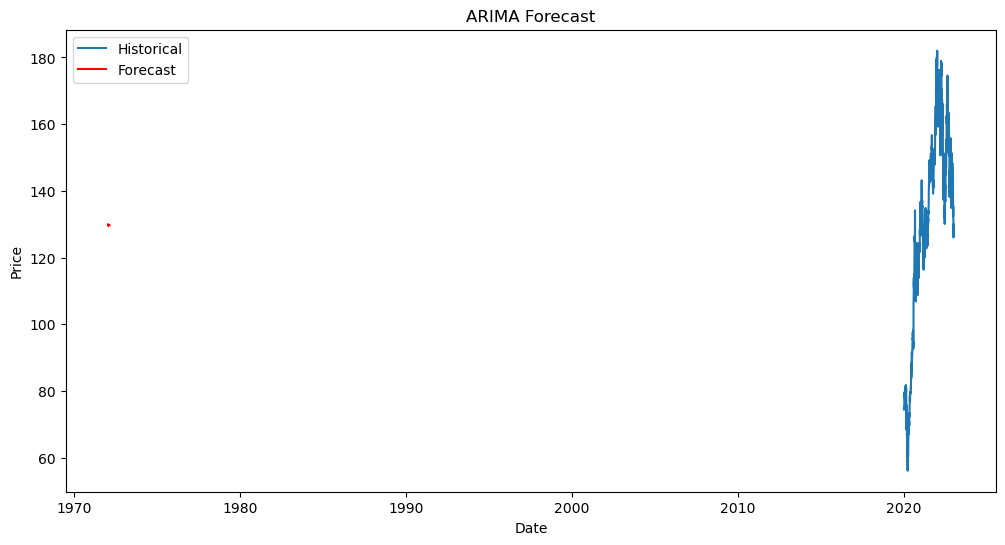

In [22]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data = data['Close']

# Plot the closing prices
data.plot(title='AAPL Closing Prices')
plt.show()

# Fit ARIMA model (p=5, d=1, q=0)
arima_order = (5, 1, 0)
model = ARIMA(data, order=arima_order)
arima_fit = model.fit()

# Print model summary
print(arima_fit.summary())

# Forecast future values
forecast = arima_fit.forecast(steps=30)
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with a

MAE: 23.48859871972412
MSE: 720.7777730265226
RMSE: 26.847304762797375
MAPE: nan%


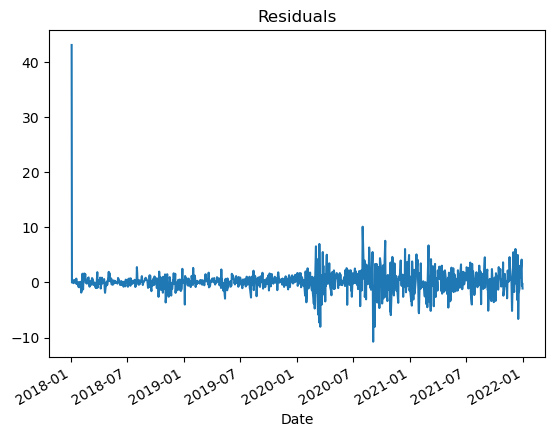

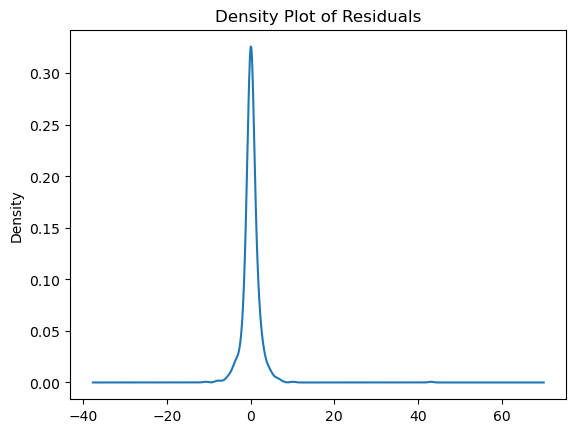

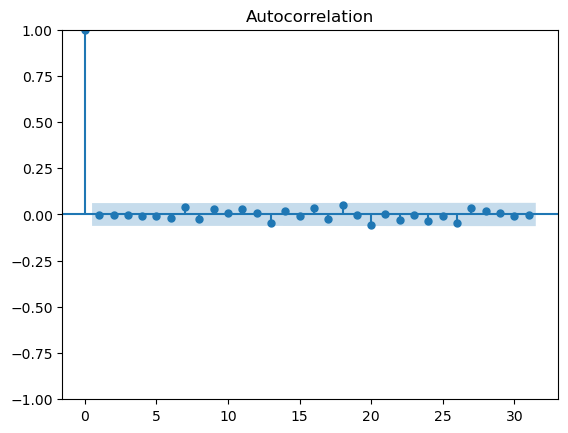

Ljung-Box test:
     lb_stat  lb_pvalue
10  3.600249   0.963584


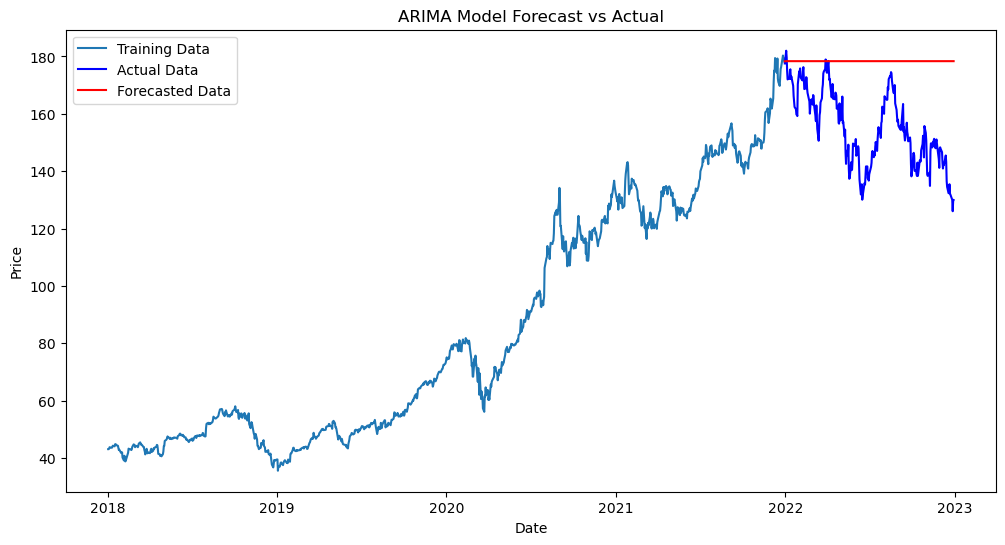

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Average MSE from cross-validation: 495.6544829569888
Naive Forecast MSE: 11.66034088284102
ADF Statistic: 0.8520659971973334
p-value: 0.9924317790667196
AIC: 4053.858620441508
BIC: 4083.341044545466


In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit

# Step 1: Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
data = data['Close']

# Step 2: Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Step 3: Fit ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = model.fit()

# Step 4: Generate forecasts
forecast = arima_fit.forecast(steps=len(test_data))

# Step 5: Evaluate forecast accuracy
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

# Step 6: Residual analysis
residuals = arima_fit.resid

# Plot residuals
residuals.plot(title='Residuals')
plt.show()

# Density plot
residuals.plot(kind='kde', title='Density Plot of Residuals')
plt.show()

# ACF plot of residuals
plot_acf(residuals)
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Ljung-Box test:')
print(lb_test)

# Step 7: Visualize forecast vs actual data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data', color='blue')
plt.plot(test_data.index, forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
errors = []

for train_index, test_index in tscv.split(data):
    train_cv, test_cv = data.iloc[train_index], data.iloc[test_index]
    model_cv = ARIMA(train_cv, order=(5, 1, 0))
    arima_fit_cv = model_cv.fit()
    forecast_cv = arima_fit_cv.forecast(steps=len(test_cv))
    mse_cv = mean_squared_error(test_cv, forecast_cv)
    errors.append(mse_cv)

average_mse = np.mean(errors)
print(f'Average MSE from cross-validation: {average_mse}')

# Step 9: Compare with naive forecast
naive_forecast = test_data.shift(1).dropna()
test_data_aligned = test_data.iloc[1:]
naive_mse = mean_squared_error(test_data_aligned, naive_forecast)
print(f'Naive Forecast MSE: {naive_mse}')

# Step 10: ADF test for stationarity
adf_result = adfuller(train_data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Step 11: Check AIC and BIC
print(f'AIC: {arima_fit.aic}')
print(f'BIC: {arima_fit.bic}')


In [27]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2018.470
Date:                Tue, 08 Oct 2024   AIC                           4042.939
Time:                        12:57:54   BIC                           4057.680
Sample:                             0   HQIC                          4048.540
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1478      0.057      2.585      0.010       0.036       0.260
ar.L1         -0.0989      0.021     -4.792      0.000      -0.139      -0.058
sigma2         3.2380      0.078     41.484      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


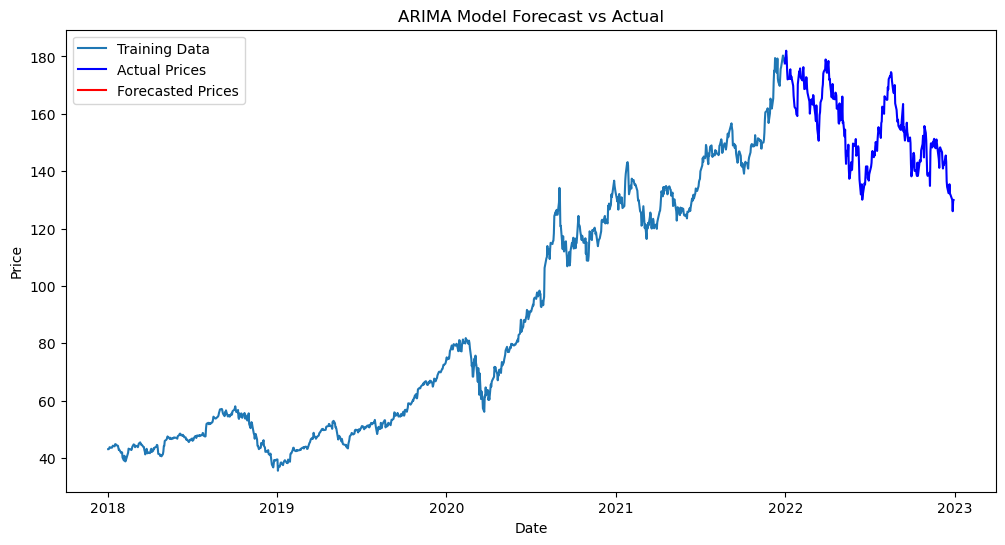

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pmdarima as pm

# Download data
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
data = data[['Close']]

# Split data
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Use auto_arima to find the best parameters
model_auto = pm.auto_arima(
    train_data['Close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    seasonal=False,
    d=None,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)

print(model_auto.summary())

# Forecast
forecast = model_auto.predict(n_periods=len(test_data))

# Convert forecast to Pandas Series
forecast = pd.Series(forecast, index=test_data.index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Actual Prices', color='blue')
plt.plot(forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/var/folders/bj/v7yqq2jx251dklc4d7nj2vyc0000gn/T/ipykernel_26582/2544626091.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Accuracy: 55.10%
Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.64      0.59        72
           0       0.00      0.00      0.00         1
           1       0.56      0.47      0.51        74

    accuracy                           0.55       147
   macro avg       0.37      0.37      0.37       147
weighted avg       0.55      0.55      0.55       147



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


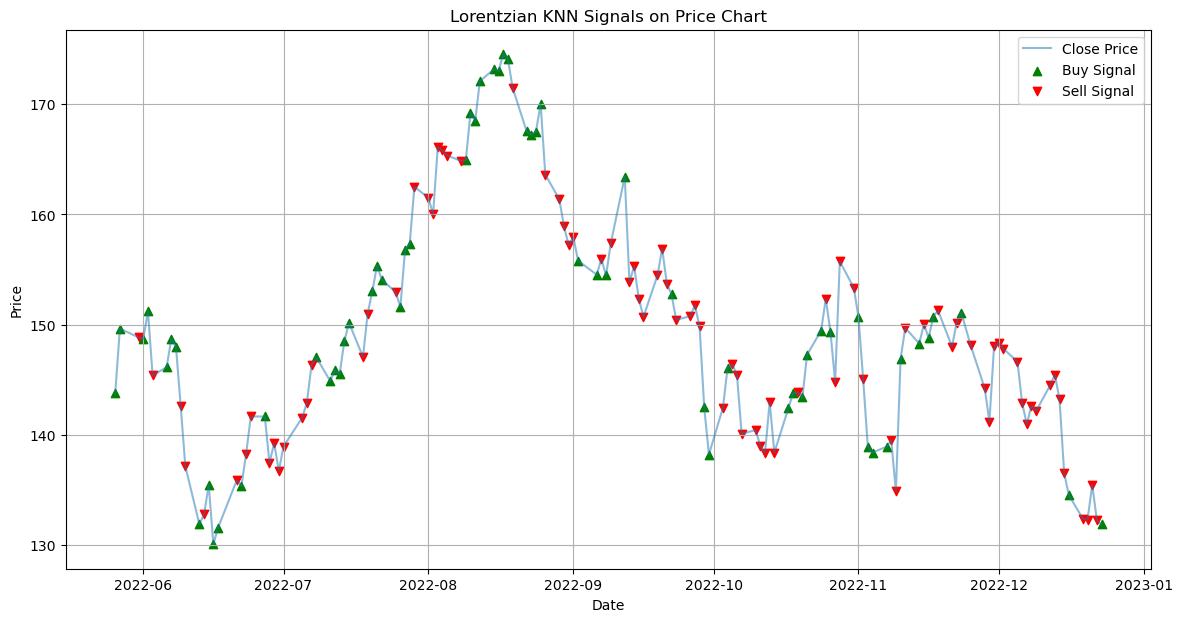

In [29]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import ta  # Technical Analysis library
import matplotlib.pyplot as plt

# Download historical price data
ticker = 'AAPL'  # You can change this to any stock symbol
data = yf.download(ticker, start='2020-01-01', end='2023-01-01', interval='1d')

# Calculate technical indicators
# RSI
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

# WaveTrend Oscillator (WT)
def calculate_wavetrend(df, n1=10, n2=11):
    hlc3 = (df['High'] + df['Low'] + df['Close']) / 3
    esa = hlc3.ewm(span=n1, adjust=False).mean()
    de = (hlc3 - esa).ewm(span=n2, adjust=False).mean().abs()
    ci = (hlc3 - esa) / (0.015 * de)
    wt = ci.ewm(span=4, adjust=False).mean()
    return wt

data['WT'] = calculate_wavetrend(data)

# CCI
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=20).cci()

# ADX
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).adx()

# Drop rows with NaN values
data.dropna(inplace=True)

# Create the target variable (future price movement over the next 4 bars)
data['Price_Change'] = data['Close'].shift(-4) - data['Close']
data['Target'] = data['Price_Change'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Drop the last 4 rows with NaN values due to shifting
data.dropna(inplace=True)

# Define the features and target
features = ['RSI', 'WT', 'CCI', 'ADX']
X = data[features]
y = data['Target']

# Handle any potential NaN values
X.dropna(inplace=True)
y = y.loc[X.index]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Define the Lorentzian distance function
def lorentzian_distance(x, y):
    return np.sum(np.log(1 + np.abs(x - y)))

# Custom KNN Classifier using Lorentzian distance
class LorentzianKNN(KNeighborsClassifier):
    def __init__(self, n_neighbors=8):
        super().__init__(
            n_neighbors=n_neighbors,
            metric=lorentzian_distance,
            algorithm='brute'  # Use brute-force search
        )

# Initialize the Lorentzian KNN classifier
knn = LorentzianKNN(n_neighbors=8)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Add predictions to the DataFrame
data_test = data.iloc[split_index:].copy()
data_test['Prediction'] = y_pred
data_test['Signal'] = data_test['Prediction'].replace({-1: 'Sell', 0: 'Hold', 1: 'Buy'})

# Plot the signals on the price chart
plt.figure(figsize=(14, 7))
plt.plot(data_test['Close'], label='Close Price', alpha=0.5)

# Plot Buy Signals
buy_signals = data_test[data_test['Signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot Sell Signals
sell_signals = data_test[data_test['Signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Lorentzian KNN Signals on Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


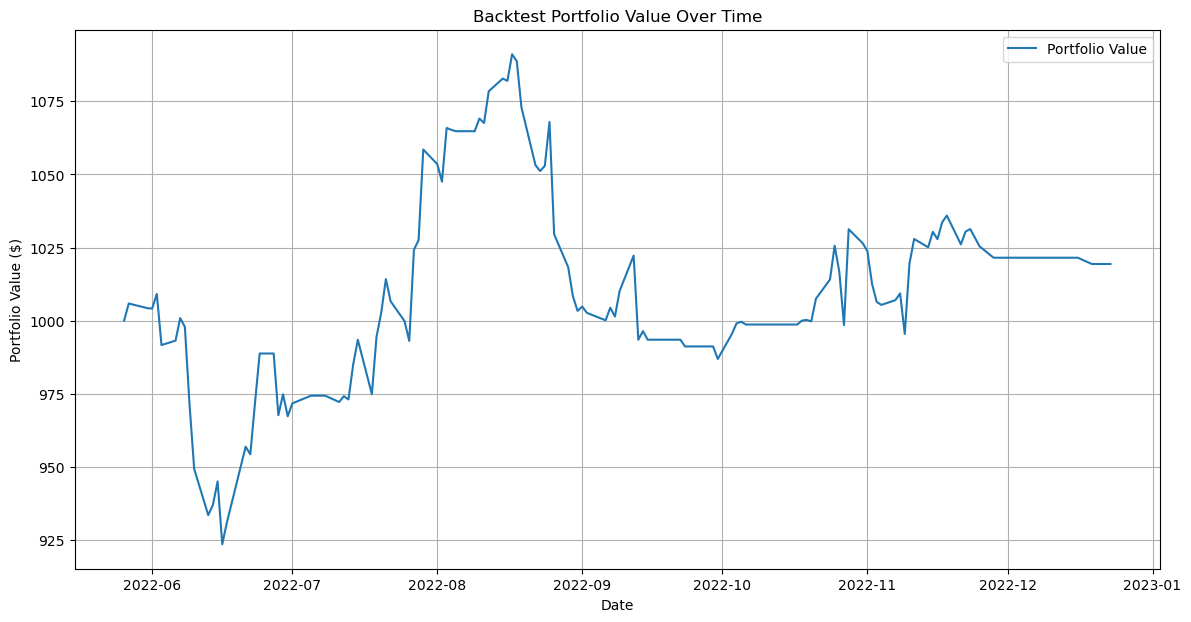

Initial Capital: $1000
Final Portfolio Value: $1019.38
Total Return: 1.94%


In [30]:
# Initialize variables for backtesting
initial_capital = 1000
capital = initial_capital
position = 0  # Number of shares held
portfolio_value = []

# Iterate over the test data to simulate trading
for index, row in data_test.iterrows():
    signal = row['Signal']
    close_price = row['Close']
    
    if signal == 'Buy' and capital >= close_price:
        # Buy one share
        position += 1
        capital -= close_price
    elif signal == 'Sell' and position > 0:
        # Sell one share
        position -= 1
        capital += close_price
    
    # Calculate the current portfolio value
    current_value = capital + position * close_price
    portfolio_value.append(current_value)

# Add portfolio value to the DataFrame
data_test['Portfolio_Value'] = portfolio_value

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(data_test.index, data_test['Portfolio_Value'], label='Portfolio Value')
plt.title('Backtest Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid()
plt.show()

# Print the final portfolio value
final_value = data_test['Portfolio_Value'].iloc[-1]
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {((final_value - initial_capital) / initial_capital) * 100:.2f}%")